# Tasks

# imports


In [1]:
# Machine Learning Library that contains example datasets.
import sklearn as skl

# Data frames
import pandas as pd

#Plots the various histograms
import matplotlib.pyplot as plt

# Numerical arrays, in case we need to mess with the array, 
# though our array is only 2 dimensional and we're not applying any addition/mulitplication etc
import numpy as np

## Task 1: Source the Data Set

We want to import the Iris data set from the sklearn.datasets module.
Then explain what the load_iris() function returns.

In [2]:
col_names= ("sepal_length",
    "sepal_width", 
    "petal_length", 
    "petal_width", 
    "class", 
)

#Load the iris dataset in as a dataframe. we can do this using the Pandas library which is used for data manipulation.
iris_df = pd.read_csv ("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv", sep=',', header=0, names=col_names)


The pd.read_csv () imports in as a dataframe the data from an external source (in this case a csv file in the hyperlink) .

## Task 2: Explore the Data Structure

Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

In [3]:
#df.head() 
iris_df 
# this command shows us more information that just requesting the top few rows with the head command)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Let's use drop na to get rid of the values in the series that have no value
iris_df.dropna(inplace=True)

 By calling the variable name that we assiged to the data we loaded,  it displays the data in a table. As someone has written in the names of the four different characteristics (sepal length, sepal width, petal length, and petal width) and the species which comprises three classes, Pandas has worked out these are the headers to the various variables oservations. Pandas tells us that yes there are 5 variables, and there are 150 observations, so we can say that the shape of the dataset is 150 x 5.
There are 50 observations for each of the three species, and we can see the sepal length, sepal width, petal length, and petal width for each of the 50 observations for each species.

In [5]:
iris_df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

Again, just confirming that there are 5 different variables.

In [6]:
iris_df["class"].shape

(150,)

Again, showing there are 150 rows or observations.

## Task 3: Summarize the Data

For each feature in the dataset, calculate and display:

    mean
    minimum
    maximum
    standard deviation
    median


In [7]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#iris_df.corr()

Here we can see the number of iris, the mean or average of each of the four variables (sepal length, sepal width, petal length, and petal width), the standard deviation around the mean value, the minimum and maximum values, and finally the different quartiles, where the 50% quartile is our median value.

## Task 4: Visualize Features

Plot histograms for each feature using matplotlib.
Add appropriate titles and axis labels.


In [9]:
print(f"{iris_df[0,1]}")

KeyError: (0, 1)

In [ ]:
 ## This is our source data put into a multidimensional array

setosa = [[5.1,3.5,1.4,0.2],[4.9,3.0,1.4,0.2],[4.7,3.2,1.3,0.2],[4.6,3.1,1.5,0.2],[5.0,3.6,1.4,0.2],[5.4,3.9,1.7,0.4],[4.6,3.4,1.4,0.3],[5.0,3.4,1.5,0.2],[4.4,2.9,1.4,0.2],[4.9,3.1,1.5,0.1],[5.4,3.7,1.5,0.2],[4.8,3.4,1.6,0.2],[4.8,3.0,1.4,0.1],[4.3,3.0,1.1,0.1],[5.8,4.0,1.2,0.2],[5.7,4.4,1.5,0.4],[5.4,3.9,1.3,0.4],[5.1,3.5,1.4,0.3],[5.7,3.8,1.7,0.3],[5.1,3.8,1.5,0.3],[5.4,3.4,1.7,0.2],[5.1,3.7,1.5,0.4],[4.6,3.6,1.0,0.2],[5.1,3.3,1.7,0.5],[4.8,3.4,1.9,0.2],[5.0,3.0,1.6,0.2],[5.0,3.4,1.6,0.4],[5.2,3.5,1.5,0.2],[5.2,3.4,1.4,0.2],[4.7,3.2,1.6,0.2],[4.8,3.1,1.6,0.2],[5.4,3.4,1.5,0.4],[5.2,4.1,1.5,0.1],[5.5,4.2,1.4,0.2],[4.9,3.1,1.5,0.1],[5.0,3.2,1.2,0.2],[5.5,3.5,1.3,0.2],[4.9,3.1,1.5,0.1],[4.4,3.0,1.3,0.2],[5.1,3.4,1.5,0.2],[5.0,3.5,1.3,0.3],[4.5,2.3,1.3,0.3],[4.4,3.2,1.3,0.2],[5.0,3.5,1.6,0.6],[5.1,3.8,1.9,0.4],[4.8,3.0,1.4,0.3],[5.1,3.8,1.6,0.2],[4.6,3.2,1.4,0.2],[5.3,3.7,1.5,0.2],[5.0,3.3,1.4,0.2]]
versicolor= [[7.0,3.2,4.7,1.4],[6.4,3.2,4.5,1.5],[6.9,3.1,4.9,1.5],[5.5,2.3,4.0,1.3],[6.5,2.8,4.6,1.5],[5.7,2.8,4.5,1.3],[6.3,3.3,4.7,1.6],[4.9,2.4,3.3,1.0],[6.6,2.9,4.6,1.3],[5.2,2.7,3.9,1.4],[5.0,2.0,3.5,1.0],[5.9,3.0,4.2,1.5],[6.0,2.2,4.0,1.0],[6.1,2.9,4.7,1.4],[5.6,2.9,3.6,1.3],[6.7,3.1,4.4,1.4],[5.6,3.0,4.5,1.5],[5.8,2.7,4.1,1.0],[6.2,2.2,4.5,1.5],[5.6,2.5,3.9,1.1],[5.9,3.2,4.8,1.8],[6.1,2.8,4.0,1.3],[6.3,2.5,4.9,1.5],[6.1,2.8,4.7,1.2],[6.4,2.9,4.3,1.3],[6.6,3.0,4.4,1.4],[6.8,2.8,4.8,1.4],[6.7,3.0,5.0,1.7],[6.0,2.9,4.5,1.5],[5.7,2.6,3.5,1.0],[5.5,2.4,3.8,1.1],[5.5,2.4,3.7,1.0],[5.8,2.7,3.9,1.2],[6.0,2.7,5.1,1.6],[5.4,3.0,4.5,1.5],[6.0,3.4,4.5,1.6],[6.7,3.1,4.7,1.5],[6.3,2.3,4.4,1.3],[5.6,3.0,4.1,1.3],[5.5,2.5,4.0,1.3],[5.5,2.6,4.4,1.2],[6.1,3.0,4.6,1.4],[5.8,2.6,4.0,1.2],[5.0,2.3,3.3,1.0],[5.6,2.7,4.2,1.3],[5.7,3.0,4.2,1.2],[5.7,2.9,4.2,1.3],[6.2,2.9,4.3,1.3],[5.1,2.5,3.0,1.1],[5.7,2.8,4.1,1.3]]
virginica= [[6.3,3.3,6.0,2.5],[5.8,2.7,5.1,1.9],[7.1,3.0,5.9,2.1],[6.3,2.9,5.6,1.8],[6.5,3.0,5.8,2.2],[7.6,3.0,6.6,2.1],[4.9,2.5,4.5,1.7],[7.3,2.9,6.3,1.8],[6.7,2.5,5.8,1.8],[7.2,3.6,6.1,2.5],[6.5,3.2,5.1,2.0],[6.4,2.7,5.3,1.9],[6.8,3.0,5.5,2.1],[5.7,2.5,5.0,2.0],[5.8,2.8,5.1,2.4],[6.4,3.2,5.3,2.3],[6.5,3.0,5.5,1.8],[7.7,3.8,6.7,2.2],[7.7,2.6,6.9,2.3],[6.0,2.2,5.0,1.5],[6.9,3.2,5.7,2.3],[5.6,2.8,4.9,2.0],[7.7,2.8,6.7,2.0],[6.3,2.7,4.9,1.8],[6.7,3.3,5.7,2.1],[7.2,3.2,6.0,1.8],[6.2,2.8,4.8,1.8],[6.1,3.0,4.9,1.8],[6.4,2.8,5.6,2.1],[7.2,3.0,5.8,1.6],[7.4,2.8,6.1,1.9],[7.9,3.8,6.4,2.0],[6.4,2.8,5.6,2.2],[6.3,2.8,5.1,1.5],[6.1,2.6,5.6,1.4],[7.7,3.0,6.1,2.3],[6.3,3.4,5.6,2.4],[6.4,3.1,5.5,1.8],[6.0,3.0,4.8,1.8],[6.9,3.1,5.4,2.1],[6.7,3.1,5.6,2.4],[6.9,3.1,5.1,2.3],[5.8,2.7,5.1,1.9],[6.8,3.2,5.9,2.3],[6.7,3.3,5.7,2.5],[6.7,3.0,5.2,2.3],[6.3,2.5,5.0,1.9],[6.5,3.0,5.2,2.0],[6.2,3.4,5.4,2.3],[5.9,3.0,5.1,1.8]]

iris=(setosa,versicolor,virginica)


### Sepal Lengths

Our data for the sepal lengths of each of our three unique types of iris are as:

In [ ]:
setosa_sepal_length=[iris[0][0][0],iris[0][1][0],iris[0][2][0],iris[0][3][0],iris[0][4][0],iris[0][5][0],iris[0][6][0],iris[0][7][0],iris[0][8][0],iris[0][9][0],iris[0][10][0],iris[0][11][0],iris[0][12][0],iris[0][13][0],iris[0][14][0],iris[0][15][0],iris[0][16][0],iris[0][17][0],iris[0][18][0],iris[0][19][0],iris[0][20][0],iris[0][21][0],iris[0][22][0],iris[0][23][0],iris[0][24][0],iris[0][25][0],iris[0][26][0],iris[0][27][0],iris[0][28][0],iris[0][29][0],iris[0][30][0],iris[0][31][0],iris[0][32][0],iris[0][33][0],iris[0][34][0],iris[0][35][0],iris[0][36][0],iris[0][37][0],iris[0][38][0],iris[0][39][0],iris[0][40][0],iris[0][41][0],iris[0][42][0],iris[0][43][0],iris[0][44][0],iris[0][45][0],iris[0][46][0],iris[0][47][0],iris[0][48][0],iris[0][49][0]]
print(f"Setosa Sepal Lengths are: {setosa_sepal_length}")
versicolor_sepal_length=[iris[1][0][0],iris[1][1][0],iris[1][2][0],iris[1][3][0],iris[1][4][0],iris[1][5][0],iris[1][6][0],iris[1][7][0],iris[1][8][0],iris[1][9][0],iris[1][10][0],iris[1][11][0],iris[1][12][0],iris[1][13][0],iris[1][14][0],iris[1][15][0],iris[1][16][0],iris[1][17][0],iris[1][18][0],iris[1][19][0],iris[1][20][0],iris[1][21][0],iris[1][22][0],iris[1][23][0],iris[1][24][0],iris[1][25][0],iris[1][26][0],iris[1][27][0],iris[1][28][0],iris[1][29][0],iris[1][30][0],iris[1][31][0],iris[1][32][0],iris[1][33][0],iris[1][34][0],iris[1][35][0],iris[1][36][0],iris[1][37][0],iris[1][38][0],iris[1][39][0],iris[1][40][0],iris[1][41][0],iris[1][42][0],iris[1][43][0],iris[1][44][0],iris[1][45][0],iris[1][46][0],iris[1][47][0],iris[1][48][0],iris[1][49][0]]
print(f"Versicolor Sepal Lengths are: {versicolor_sepal_length}")
virginica_sepal_length=[iris[2][0][0],iris[2][1][0],iris[2][2][0],iris[2][3][0],iris[2][4][0],iris[2][5][0],iris[2][6][0],iris[2][7][0],iris[2][8][0],iris[2][9][0],iris[2][10][0],iris[2][11][0],iris[2][12][0],iris[2][13][0],iris[2][14][0],iris[2][15][0],iris[2][16][0],iris[2][17][0],iris[2][18][0],iris[2][19][0],iris[2][20][0],iris[2][21][0],iris[2][22][0],iris[2][23][0],iris[2][24][0],iris[2][25][0],iris[2][26][0],iris[2][27][0],iris[2][28][0],iris[2][29][0],iris[2][30][0],iris[2][31][0],iris[2][32][0],iris[2][33][0],iris[2][34][0],iris[2][35][0],iris[2][36][0],iris[2][37][0],iris[2][38][0],iris[2][39][0],iris[2][40][0],iris[2][41][0],iris[2][42][0],iris[2][43][0],iris[2][44][0],iris[2][45][0],iris[2][46][0],iris[2][47][0],iris[2][48][0],iris[2][49][0]]
print(f"Virginica Sepal Lengths are: {virginica_sepal_length}")

KeyError: 0

Our histograms showing how the sepal lengths of each of the three unique types of iris compare:

Text(0.5, 1.0, 'Sepal Length')

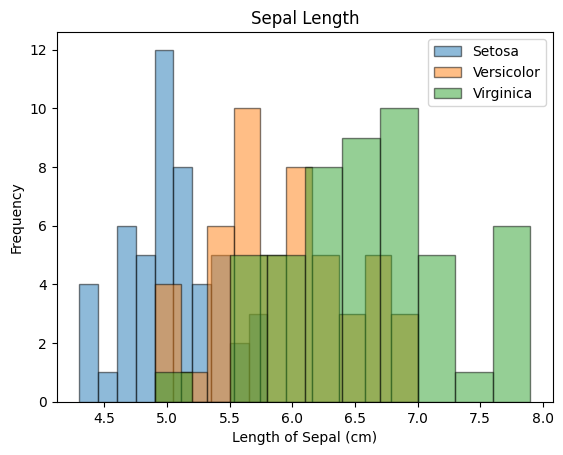

In [ ]:
fig, ax = plt.subplots()
ax.hist(setosa_sepal_length, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_sepal_length, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_sepal_length, bins=10, edgecolor="black", label="Virginica", alpha=0.5)
ax.legend()
ax.set_xlabel("Length of Sepal (cm)")
ax.set_ylabel("Frequency")
plt.title("Sepal Length")

### Descriptive Statistics for our Sepal Lengths are as follows:

In [ ]:
# Descriptive Statistics
print(f"Sepal Lengths")
print(f"\t\tSetosa\t\tVersicolor\tVirginica")
print(f"Mean:\t\t{round(np.mean(setosa_sepal_length),2)}\t\t{round(np.mean(versicolor_sepal_length),2)}\t\t{round(np.mean(virginica_sepal_length),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_sepal_length),2)}\t\t{round(np.std(versicolor_sepal_length),2)}\t\t{round(np.std(virginica_sepal_length),2)}")
print(f"Median:\t\t{round(np.median(setosa_sepal_length),2)}\t\t{round(np.median(versicolor_sepal_length),2)}\t\t{round(np.median(virginica_sepal_length),2)}")
print(f"Maximum:\t{round(np.max(setosa_sepal_length),2)}\t\t{round(np.max(versicolor_sepal_length),2)}\t\t{round(np.max(virginica_sepal_length),2)}")
print(f"25%:\t\t{round(np.percentile((setosa_sepal_length),25),2)}\t\t{round(np.percentile((versicolor_sepal_length),25),2)}\t\t{round(np.percentile((virginica_sepal_length),25),2)}")
print(f"50%:\t\t{round(np.percentile((setosa_sepal_length),50),2)}\t\t{round(np.percentile((versicolor_sepal_length),50),2)}\t\t{round(np.percentile((virginica_sepal_length),50),2)}")
print(f"75%:\t\t{round(np.percentile((setosa_sepal_length),75),2)}\t\t{round(np.percentile((versicolor_sepal_length),75),2)}\t\t{round(np.percentile((virginica_sepal_length),75),2)}")
print(f"Minimum:\t{round(np.min(setosa_sepal_length),2)}\t\t{round(np.min(versicolor_sepal_length),2)}\t\t{round(np.min(virginica_sepal_length),2)}")


Sepal Lengths
		Setosa		Versicolor	Virginica
Mean:		5.01		5.94		6.59
St.Dev:		0.35		0.51		0.63
Median:		5.0		5.9		6.5
Maximum:	5.8		7.0		7.9
25%:		4.8		5.6		6.22
50%:		5.0		5.9		6.5
75%:		5.2		6.3		6.9
Minimum:	4.3		4.9		4.9


### Sepal Widths

Our data for the sepal widths of each of our three unique types of iris are as:

In [ ]:
setosa_sepal_width=[iris[0][0][1],iris[0][1][1],iris[0][2][1],iris[0][3][1],iris[0][4][1],iris[0][5][1],iris[0][6][1],iris[0][7][1],iris[0][8][1],iris[0][9][1],iris[0][10][1],iris[0][11][1],iris[0][12][1],iris[0][13][1],iris[0][14][1],iris[0][15][1],iris[0][16][1],iris[0][17][1],iris[0][18][1],iris[0][19][1],iris[0][20][1],iris[0][21][1],iris[0][22][1],iris[0][23][1],iris[0][24][1],iris[0][25][1],iris[0][26][1],iris[0][27][1],iris[0][28][1],iris[0][29][1],iris[0][30][1],iris[0][31][1],iris[0][32][1],iris[0][33][1],iris[0][34][1],iris[0][35][1],iris[0][36][1],iris[0][37][1],iris[0][38][1],iris[0][39][1],iris[0][40][1],iris[0][41][1],iris[0][42][1],iris[0][43][1],iris[0][44][1],iris[0][45][1],iris[0][46][1],iris[0][47][1],iris[0][48][1],iris[0][49][1]]
print(f"Setosa Sepal Widths are: {setosa_sepal_width}")
versicolor_sepal_width=[iris[1][0][1],iris[1][1][1],iris[1][2][1],iris[1][3][1],iris[1][4][1],iris[1][5][1],iris[1][6][1],iris[1][7][1],iris[1][8][1],iris[1][9][1],iris[1][10][1],iris[1][11][1],iris[1][12][1],iris[1][13][1],iris[1][14][1],iris[1][15][1],iris[1][16][1],iris[1][17][1],iris[1][18][1],iris[1][19][1],iris[1][20][1],iris[1][21][1],iris[1][22][1],iris[1][23][1],iris[1][24][1],iris[1][25][1],iris[1][26][1],iris[1][27][1],iris[1][28][1],iris[1][29][1],iris[1][30][1],iris[1][31][1],iris[1][32][1],iris[1][33][1],iris[1][34][1],iris[1][35][1],iris[1][36][1],iris[1][37][1],iris[1][38][1],iris[1][39][1],iris[1][40][1],iris[1][41][1],iris[1][42][1],iris[1][43][1],iris[1][44][1],iris[1][45][1],iris[1][46][1],iris[1][47][1],iris[1][48][1],iris[1][49][1]]
print(f"Versicolor Sepal Widths are: {versicolor_sepal_width}")
virginica_sepal_width=[iris[2][0][1],iris[2][1][1],iris[2][2][1],iris[2][3][1],iris[2][4][1],iris[2][5][1],iris[2][6][1],iris[2][7][1],iris[2][8][1],iris[2][9][1],iris[2][10][1],iris[2][11][1],iris[2][12][1],iris[2][13][1],iris[2][14][1],iris[2][15][1],iris[2][16][1],iris[2][17][1],iris[2][18][1],iris[2][19][1],iris[2][20][1],iris[2][21][1],iris[2][22][1],iris[2][23][1],iris[2][24][1],iris[2][25][1],iris[2][26][1],iris[2][27][1],iris[2][28][1],iris[2][29][1],iris[2][30][1],iris[2][31][1],iris[2][32][1],iris[2][33][1],iris[2][34][1],iris[2][35][1],iris[2][36][1],iris[2][37][1],iris[2][38][1],iris[2][39][1],iris[2][40][1],iris[2][41][1],iris[2][42][1],iris[2][43][1],iris[2][44][1],iris[2][45][1],iris[2][46][1],iris[2][47][1],iris[2][48][1],iris[2][49][1]]
print(f"Virginica Sepal Widths are: {virginica_sepal_width}")

Setosa Sepal Widths are: [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3]
Versicolor Sepal Widths are: [3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8]
Virginica Sepal Widths are: [3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0]


Our histograms showing how the sepal widths of each of the three unique types of iris compare:

Text(0.5, 1.0, 'Sepal Width')

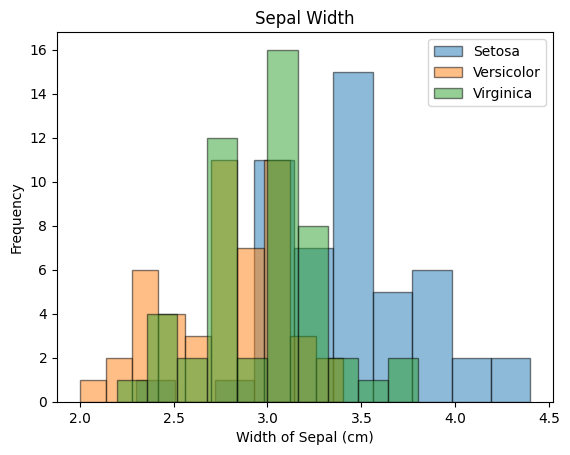

In [ ]:
fig, ax = plt.subplots()
ax.hist(setosa_sepal_width, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_sepal_width, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_sepal_width, bins=10, edgecolor="black", label="Virginica", alpha=0.5)
ax.legend()
ax.set_xlabel("Width of Sepal (cm)")
ax.set_ylabel("Frequency")
plt.title("Sepal Width")

### Descriptive Statistics for our Sepal Widths are as follows:

In [ ]:
# Descriptive Statistics
print(f"Sepal Width")
print(f"\t\tSetosa\t\tVersicolor\tVirginica")
print(f"Mean:\t\t{round(np.mean(setosa_sepal_width),2)}\t\t{round(np.mean(versicolor_sepal_width),2)}\t\t{round(np.mean(virginica_sepal_width),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_sepal_width),2)}\t\t{round(np.std(versicolor_sepal_width),2)}\t\t{round(np.std(virginica_sepal_width),2)}")
print(f"Median:\t\t{round(np.median(setosa_sepal_width),2)}\t\t{round(np.median(versicolor_sepal_width),2)}\t\t{round(np.median(virginica_sepal_width),2)}")
print(f"Maximum:\t{round(np.max(setosa_sepal_width),2)}\t\t{round(np.max(versicolor_sepal_width),2)}\t\t{round(np.max(virginica_sepal_width),2)}")
print(f"25%:\t\t{round(np.percentile((setosa_sepal_width),25),2)}\t\t{round(np.percentile((versicolor_sepal_width),25),2)}\t\t{round(np.percentile((virginica_sepal_width),25),2)}")
print(f"50%:\t\t{round(np.percentile((setosa_sepal_width),50),2)}\t\t{round(np.percentile((versicolor_sepal_width),50),2)}\t\t{round(np.percentile((virginica_sepal_width),50),2)}")
print(f"75%:\t\t{round(np.percentile((setosa_sepal_width),75),2)}\t\t{round(np.percentile((versicolor_sepal_width),75),2)}\t\t{round(np.percentile((virginica_sepal_width),75),2)}")
print(f"Minimum:\t{round(np.min(setosa_sepal_width),2)}\t\t{round(np.min(versicolor_sepal_width),2)}\t\t{round(np.min(virginica_sepal_width),2)}")



Sepal Width
		Setosa		Versicolor	Virginica
Mean:		3.42		2.77		2.97
St.Dev:		0.38		0.31		0.32
Median:		3.4		2.8		3.0
Maximum:	4.4		3.4		3.8
25%:		3.12		2.52		2.8
50%:		3.4		2.8		3.0
75%:		3.68		3.0		3.18
Minimum:	2.3		2.0		2.2


### Petal Lengths

Our data for the petal lengths of each of our three unique types of iris are as:

In [ ]:
setosa_petal_length=[iris[0][0][2],iris[0][1][2],iris[0][2][2],iris[0][3][2],iris[0][4][2],iris[0][5][2],iris[0][6][2],iris[0][7][2],iris[0][8][2],iris[0][9][2],iris[0][10][2],iris[0][11][2],iris[0][12][2],iris[0][13][2],iris[0][14][2],iris[0][15][2],iris[0][16][2],iris[0][17][2],iris[0][18][2],iris[0][19][2],iris[0][20][2],iris[0][21][2],iris[0][22][2],iris[0][23][2],iris[0][24][2],iris[0][25][2],iris[0][26][2],iris[0][27][2],iris[0][28][2],iris[0][29][2],iris[0][30][2],iris[0][31][2],iris[0][32][2],iris[0][33][2],iris[0][34][2],iris[0][35][2],iris[0][36][2],iris[0][37][2],iris[0][38][2],iris[0][39][2],iris[0][40][2],iris[0][41][2],iris[0][42][2],iris[0][43][2],iris[0][44][2],iris[0][45][2],iris[0][46][2],iris[0][47][2],iris[0][48][2],iris[0][49][2]]
print(f"Setosa Petal Lengths are: {setosa_petal_length}")
versicolor_petal_length=[iris[1][0][2],iris[1][1][2],iris[1][2][2],iris[1][3][2],iris[1][4][2],iris[1][5][2],iris[1][6][2],iris[1][7][2],iris[1][8][2],iris[1][9][2],iris[1][10][2],iris[1][11][2],iris[1][12][2],iris[1][13][2],iris[1][14][2],iris[1][15][2],iris[1][16][2],iris[1][17][2],iris[1][18][2],iris[1][19][2],iris[1][20][2],iris[1][21][2],iris[1][22][2],iris[1][23][2],iris[1][24][2],iris[1][25][2],iris[1][26][2],iris[1][27][2],iris[1][28][2],iris[1][29][2],iris[1][30][2],iris[1][31][2],iris[1][32][2],iris[1][33][2],iris[1][34][2],iris[1][35][2],iris[1][36][2],iris[1][37][2],iris[1][38][2],iris[1][39][2],iris[1][40][2],iris[1][41][2],iris[1][42][2],iris[1][43][2],iris[1][44][2],iris[1][45][2],iris[1][46][2],iris[1][47][2],iris[1][48][2],iris[1][49][2]]
print(f"Versicolor Petal Lengths are: {versicolor_petal_length}")
virginica_petal_length=[iris[2][0][2],iris[2][1][2],iris[2][2][2],iris[2][3][2],iris[2][4][2],iris[2][5][2],iris[2][6][2],iris[2][7][2],iris[2][8][2],iris[2][9][2],iris[2][10][2],iris[2][11][2],iris[2][12][2],iris[2][13][2],iris[2][14][2],iris[2][15][2],iris[2][16][2],iris[2][17][2],iris[2][18][2],iris[2][19][2],iris[2][20][2],iris[2][21][2],iris[2][22][2],iris[2][23][2],iris[2][24][2],iris[2][25][2],iris[2][26][2],iris[2][27][2],iris[2][28][2],iris[2][29][2],iris[2][30][2],iris[2][31][2],iris[2][32][2],iris[2][33][2],iris[2][34][2],iris[2][35][2],iris[2][36][2],iris[2][37][2],iris[2][38][2],iris[2][39][2],iris[2][40][2],iris[2][41][2],iris[2][42][2],iris[2][43][2],iris[2][44][2],iris[2][45][2],iris[2][46][2],iris[2][47][2],iris[2][48][2],iris[2][49][2]]
print(f"Virginica Petal Lengths are: {virginica_petal_length}")

Setosa Petal Lengths are: [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4]
Versicolor Petal Lengths are: [4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1]
Virginica Petal Lengths are: [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]


Our histograms showing how the petal lengths of each of the three unique types of iris compare:

Text(0.5, 1.0, 'Petal Length')

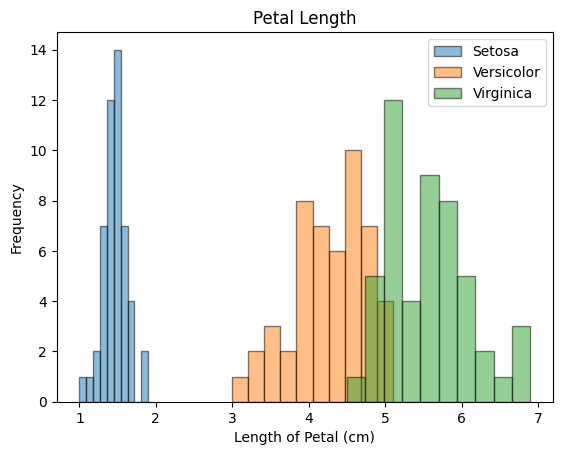

In [ ]:
fig, ax = plt.subplots()
ax.hist(setosa_petal_length, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_petal_length, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_petal_length, bins=10, edgecolor="black", label="Virginica", alpha=0.5)
ax.legend()
ax.set_xlabel("Length of Petal (cm)")
ax.set_ylabel("Frequency")
plt.title("Petal Length")

### Descriptive Statistics for our Petal Lengths are as follows:

In [ ]:
# Descriptive Statistics
print(f"Petal Length")
print(f"\t\tSetosa\t\tVersicolor\tVirginica")
print(f"Mean:\t\t{round(np.mean(setosa_petal_length),2)}\t\t{round(np.mean(versicolor_petal_length),2)}\t\t{round(np.mean(virginica_petal_length),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_petal_length),2)}\t\t{round(np.std(versicolor_petal_length),2)}\t\t{round(np.std(virginica_petal_length),2)}")
print(f"Median:\t\t{round(np.median(setosa_petal_length),2)}\t\t{round(np.median(versicolor_petal_length),2)}\t\t{round(np.median(virginica_petal_length),2)}")
print(f"Maximum:\t{round(np.max(setosa_petal_length),2)}\t\t{round(np.max(versicolor_petal_length),2)}\t\t{round(np.max(virginica_petal_length),2)}")
print(f"25%:\t\t{round(np.percentile((setosa_petal_length),25),2)}\t\t{round(np.percentile((versicolor_petal_length),25),2)}\t\t{round(np.percentile((virginica_petal_length),25),2)}")
print(f"50%:\t\t{round(np.percentile((setosa_petal_length),50),2)}\t\t{round(np.percentile((versicolor_petal_length),50),2)}\t\t{round(np.percentile((virginica_petal_length),50),2)}")
print(f"75%:\t\t{round(np.percentile((setosa_petal_length),75),2)}\t\t{round(np.percentile((versicolor_petal_length),75),2)}\t\t{round(np.percentile((virginica_petal_length),75),2)}")
print(f"Minimum:\t{round(np.min(setosa_petal_length),2)}\t\t{round(np.min(versicolor_petal_length),2)}\t\t{round(np.min(virginica_petal_length),2)}")



Petal Length
		Setosa		Versicolor	Virginica
Mean:		1.46		4.26		5.55
St.Dev:		0.17		0.47		0.55
Median:		1.5		4.35		5.55
Maximum:	1.9		5.1		6.9
25%:		1.4		4.0		5.1
50%:		1.5		4.35		5.55
75%:		1.58		4.6		5.88
Minimum:	1.0		3.0		4.5


### Petal Widths

Our data for the petal widths of each of our three unique types of iris are as:

In [ ]:
setosa_petal_width=[iris[0][0][3],iris[0][1][3],iris[0][2][3],iris[0][3][3],iris[0][4][3],iris[0][5][3],iris[0][6][3],iris[0][7][3],iris[0][8][3],iris[0][9][3],iris[0][10][3],iris[0][11][3],iris[0][12][3],iris[0][13][3],iris[0][14][3],iris[0][15][3],iris[0][16][3],iris[0][17][3],iris[0][18][3],iris[0][19][3],iris[0][20][3],iris[0][21][3],iris[0][22][3],iris[0][23][3],iris[0][24][3],iris[0][25][3],iris[0][26][3],iris[0][27][3],iris[0][28][3],iris[0][29][3],iris[0][30][3],iris[0][31][3],iris[0][32][3],iris[0][33][3],iris[0][34][3],iris[0][35][3],iris[0][36][3],iris[0][37][3],iris[0][38][3],iris[0][39][3],iris[0][40][3],iris[0][41][3],iris[0][42][3],iris[0][43][3],iris[0][44][3],iris[0][45][3],iris[0][46][3],iris[0][47][3],iris[0][48][3],iris[0][49][3]]
print(f"Setosa Petal Widths are: {setosa_petal_width}")
versicolor_petal_width=[iris[1][0][3],iris[1][1][3],iris[1][2][3],iris[1][3][3],iris[1][4][3],iris[1][5][3],iris[1][6][3],iris[1][7][3],iris[1][8][3],iris[1][9][3],iris[1][10][3],iris[1][11][3],iris[1][12][3],iris[1][13][3],iris[1][14][3],iris[1][15][3],iris[1][16][3],iris[1][17][3],iris[1][18][3],iris[1][19][3],iris[1][20][3],iris[1][21][3],iris[1][22][3],iris[1][23][3],iris[1][24][3],iris[1][25][3],iris[1][26][3],iris[1][27][3],iris[1][28][3],iris[1][29][3],iris[1][30][3],iris[1][31][3],iris[1][32][3],iris[1][33][3],iris[1][34][3],iris[1][35][3],iris[1][36][3],iris[1][37][3],iris[1][38][3],iris[1][39][3],iris[1][40][3],iris[1][41][3],iris[1][42][3],iris[1][43][3],iris[1][44][3],iris[1][45][3],iris[1][46][3],iris[1][47][3],iris[1][48][3],iris[1][49][3]]
print(f"Versicolor Petal Widths are: {versicolor_petal_width}")
virginica_petal_width=[iris[2][0][3],iris[2][1][3],iris[2][2][3],iris[2][3][3],iris[2][4][3],iris[2][5][3],iris[2][6][3],iris[2][7][3],iris[2][8][3],iris[2][9][3],iris[2][10][3],iris[2][11][3],iris[2][12][3],iris[2][13][3],iris[2][14][3],iris[2][15][3],iris[2][16][3],iris[2][17][3],iris[2][18][3],iris[2][19][3],iris[2][20][3],iris[2][21][3],iris[2][22][3],iris[2][23][3],iris[2][24][3],iris[2][25][3],iris[2][26][3],iris[2][27][3],iris[2][28][3],iris[2][29][3],iris[2][30][3],iris[2][31][3],iris[2][32][3],iris[2][33][3],iris[2][34][3],iris[2][35][3],iris[2][36][3],iris[2][37][3],iris[2][38][3],iris[2][39][3],iris[2][40][3],iris[2][41][3],iris[2][42][3],iris[2][43][3],iris[2][44][3],iris[2][45][3],iris[2][46][3],iris[2][47][3],iris[2][48][3],iris[2][49][3]]
print(f"Virginica Petal Widths are: {virginica_petal_width}")

Setosa Petal Widths are: [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2]
Versicolor Petal Widths are: [1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3]
Virginica Petal Widths are: [2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8]


Our histograms showing how the petal widths of each of the three unique types of iris compare:

Text(0.5, 1.0, 'Petal Width')

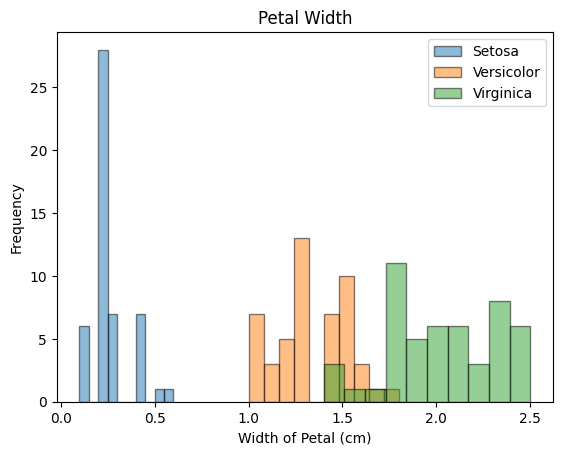

In [ ]:
fig, ax = plt.subplots()
ax.hist(setosa_petal_width, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_petal_width, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_petal_width, bins=10, edgecolor="black", label="Virginica", alpha=0.5)
ax.legend()
ax.set_xlabel("Width of Petal (cm)")
ax.set_ylabel("Frequency")
plt.title("Petal Width")

### Descriptive Statistics for our Petal Widths are as follows:

In [ ]:
# Descriptive Statistics
print(f"Petal Widths")
print(f"\t\tSetosa\t\tVersicolor\tVirginica")
print(f"Mean:\t\t{round(np.mean(setosa_petal_width),2)}\t\t{round(np.mean(versicolor_petal_width),2)}\t\t{round(np.mean(virginica_petal_width),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_petal_width),2)}\t\t{round(np.std(versicolor_petal_width),2)}\t\t{round(np.std(virginica_petal_width),2)}")
print(f"Median:\t\t{round(np.median(setosa_petal_width),2)}\t\t{round(np.median(versicolor_petal_width),2)}\t\t{round(np.median(virginica_petal_width),2)}")
print(f"Maximum:\t{round(np.max(setosa_petal_width),2)}\t\t{round(np.max(versicolor_petal_width),2)}\t\t{round(np.max(virginica_petal_width),2)}")
print(f"25%:\t\t{round(np.percentile((setosa_petal_width),25),2)}\t\t{round(np.percentile((versicolor_petal_width),25),2)}\t\t{round(np.percentile((virginica_petal_width),25),2)}")
print(f"50%:\t\t{round(np.percentile((setosa_petal_width),50),2)}\t\t{round(np.percentile((versicolor_petal_width),50),2)}\t\t{round(np.percentile((virginica_petal_width),50),2)}")
print(f"75%:\t\t{round(np.percentile((setosa_petal_width),75),2)}\t\t{round(np.percentile((versicolor_petal_width),75),2)}\t\t{round(np.percentile((virginica_petal_width),75),2)}")
print(f"Minimum:\t{round(np.min(setosa_petal_width),2)}\t\t{round(np.min(versicolor_petal_width),2)}\t\t{round(np.min(virginica_petal_width),2)}")



Petal Widths
		Setosa		Versicolor	Virginica
Mean:		0.24		1.33		2.03
St.Dev:		0.11		0.2		0.27
Median:		0.2		1.3		2.0
Maximum:	0.6		1.8		2.5
25%:		0.2		1.2		1.8
50%:		0.2		1.3		2.0
75%:		0.3		1.5		2.3
Minimum:	0.1		1.0		1.4


## Task 5: Investigate Relationships

Choosing two features from the data set, I'm going to create a scatter plot to investigate their relationship, if any.
I will color-code each the three different classes of iris on the scatter plot points.

Intuitively, my scatter plot should show a positive relationship between the length of a petal and its width. Further, I want to show that this relationship is consistent across all three types of iris, even though their relative petal sizes my differ from one another.

My data for the petal widths is as follows.

In [ ]:
setosa_petal_width=[iris[0][0][3],iris[0][1][3],iris[0][2][3],iris[0][3][3],iris[0][4][3],iris[0][5][3],iris[0][6][3],iris[0][7][3],iris[0][8][3],iris[0][9][3],iris[0][10][3],iris[0][11][3],iris[0][12][3],iris[0][13][3],iris[0][14][3],iris[0][15][3],iris[0][16][3],iris[0][17][3],iris[0][18][3],iris[0][19][3],iris[0][20][3],iris[0][21][3],iris[0][22][3],iris[0][23][3],iris[0][24][3],iris[0][25][3],iris[0][26][3],iris[0][27][3],iris[0][28][3],iris[0][29][3],iris[0][30][3],iris[0][31][3],iris[0][32][3],iris[0][33][3],iris[0][34][3],iris[0][35][3],iris[0][36][3],iris[0][37][3],iris[0][38][3],iris[0][39][3],iris[0][40][3],iris[0][41][3],iris[0][42][3],iris[0][43][3],iris[0][44][3],iris[0][45][3],iris[0][46][3],iris[0][47][3],iris[0][48][3],iris[0][49][3]]
versicolor_petal_width=[iris[1][0][3],iris[1][1][3],iris[1][2][3],iris[1][3][3],iris[1][4][3],iris[1][5][3],iris[1][6][3],iris[1][7][3],iris[1][8][3],iris[1][9][3],iris[1][10][3],iris[1][11][3],iris[1][12][3],iris[1][13][3],iris[1][14][3],iris[1][15][3],iris[1][16][3],iris[1][17][3],iris[1][18][3],iris[1][19][3],iris[1][20][3],iris[1][21][3],iris[1][22][3],iris[1][23][3],iris[1][24][3],iris[1][25][3],iris[1][26][3],iris[1][27][3],iris[1][28][3],iris[1][29][3],iris[1][30][3],iris[1][31][3],iris[1][32][3],iris[1][33][3],iris[1][34][3],iris[1][35][3],iris[1][36][3],iris[1][37][3],iris[1][38][3],iris[1][39][3],iris[1][40][3],iris[1][41][3],iris[1][42][3],iris[1][43][3],iris[1][44][3],iris[1][45][3],iris[1][46][3],iris[1][47][3],iris[1][48][3],iris[1][49][3]]
virginica_petal_width=[iris[2][0][3],iris[2][1][3],iris[2][2][3],iris[2][3][3],iris[2][4][3],iris[2][5][3],iris[2][6][3],iris[2][7][3],iris[2][8][3],iris[2][9][3],iris[2][10][3],iris[2][11][3],iris[2][12][3],iris[2][13][3],iris[2][14][3],iris[2][15][3],iris[2][16][3],iris[2][17][3],iris[2][18][3],iris[2][19][3],iris[2][20][3],iris[2][21][3],iris[2][22][3],iris[2][23][3],iris[2][24][3],iris[2][25][3],iris[2][26][3],iris[2][27][3],iris[2][28][3],iris[2][29][3],iris[2][30][3],iris[2][31][3],iris[2][32][3],iris[2][33][3],iris[2][34][3],iris[2][35][3],iris[2][36][3],iris[2][37][3],iris[2][38][3],iris[2][39][3],iris[2][40][3],iris[2][41][3],iris[2][42][3],iris[2][43][3],iris[2][44][3],iris[2][45][3],iris[2][46][3],iris[2][47][3],iris[2][48][3],iris[2][49][3]]
petal_widths=(setosa_petal_width, versicolor_petal_width,virginica_petal_width)
# I won't be using the composite array - petal_widths=(setosa_petal_width, versicolor_petal_width,virginica_petal_width)

# show the array of values 
# setosa_petal_width



My data for the petal lengths is as follows.

In [ ]:
setosa_petal_length=[iris[0][0][2],iris[0][1][2],iris[0][2][2],iris[0][3][2],iris[0][4][2],iris[0][5][2],iris[0][6][2],iris[0][7][2],iris[0][8][2],iris[0][9][2],iris[0][10][2],iris[0][11][2],iris[0][12][2],iris[0][13][2],iris[0][14][2],iris[0][15][2],iris[0][16][2],iris[0][17][2],iris[0][18][2],iris[0][19][2],iris[0][20][2],iris[0][21][2],iris[0][22][2],iris[0][23][2],iris[0][24][2],iris[0][25][2],iris[0][26][2],iris[0][27][2],iris[0][28][2],iris[0][29][2],iris[0][30][2],iris[0][31][2],iris[0][32][2],iris[0][33][2],iris[0][34][2],iris[0][35][2],iris[0][36][2],iris[0][37][2],iris[0][38][2],iris[0][39][2],iris[0][40][2],iris[0][41][2],iris[0][42][2],iris[0][43][2],iris[0][44][2],iris[0][45][2],iris[0][46][2],iris[0][47][2],iris[0][48][2],iris[0][49][2]]
versicolor_petal_length=[iris[1][0][2],iris[1][1][2],iris[1][2][2],iris[1][3][2],iris[1][4][2],iris[1][5][2],iris[1][6][2],iris[1][7][2],iris[1][8][2],iris[1][9][2],iris[1][10][2],iris[1][11][2],iris[1][12][2],iris[1][13][2],iris[1][14][2],iris[1][15][2],iris[1][16][2],iris[1][17][2],iris[1][18][2],iris[1][19][2],iris[1][20][2],iris[1][21][2],iris[1][22][2],iris[1][23][2],iris[1][24][2],iris[1][25][2],iris[1][26][2],iris[1][27][2],iris[1][28][2],iris[1][29][2],iris[1][30][2],iris[1][31][2],iris[1][32][2],iris[1][33][2],iris[1][34][2],iris[1][35][2],iris[1][36][2],iris[1][37][2],iris[1][38][2],iris[1][39][2],iris[1][40][2],iris[1][41][2],iris[1][42][2],iris[1][43][2],iris[1][44][2],iris[1][45][2],iris[1][46][2],iris[1][47][2],iris[1][48][2],iris[1][49][2]]
virginica_petal_length=[iris[2][0][2],iris[2][1][2],iris[2][2][2],iris[2][3][2],iris[2][4][2],iris[2][5][2],iris[2][6][2],iris[2][7][2],iris[2][8][2],iris[2][9][2],iris[2][10][2],iris[2][11][2],iris[2][12][2],iris[2][13][2],iris[2][14][2],iris[2][15][2],iris[2][16][2],iris[2][17][2],iris[2][18][2],iris[2][19][2],iris[2][20][2],iris[2][21][2],iris[2][22][2],iris[2][23][2],iris[2][24][2],iris[2][25][2],iris[2][26][2],iris[2][27][2],iris[2][28][2],iris[2][29][2],iris[2][30][2],iris[2][31][2],iris[2][32][2],iris[2][33][2],iris[2][34][2],iris[2][35][2],iris[2][36][2],iris[2][37][2],iris[2][38][2],iris[2][39][2],iris[2][40][2],iris[2][41][2],iris[2][42][2],iris[2][43][2],iris[2][44][2],iris[2][45][2],iris[2][46][2],iris[2][47][2],iris[2][48][2],iris[2][49][2]]
petal_lengths=(setosa_petal_length, versicolor_petal_length,virginica_petal_length)
# I won't be using the composite array - petal_lengths=(setosa_petal_length, versicolor_petal_length,virginica_petal_length)

# show the array of values
# petal_lengths

#### Scatter Chart

Now to plot the petal widths against my petal lengths.

Text(0.5, 1.0, 'Relationship between Petal Widths & Lengths')

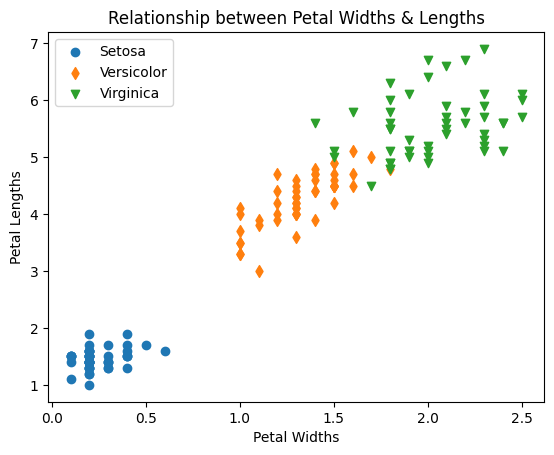

In [ ]:
fig, ax = plt.subplots()

#Scatter plot
ax.scatter(setosa_petal_width,setosa_petal_length, marker="o",label="Setosa")
ax.scatter(versicolor_petal_width,versicolor_petal_length,marker="d", label="Versicolor")
ax.scatter(virginica_petal_width,virginica_petal_length,marker="v", label="Virginica")

# Labels
ax.set_xlabel("Petal Widths")
ax.set_ylabel("Petal Lengths")
ax.legend()

plt.title("Relationship between Petal Widths & Lengths")

## Task 6: Analyze Relationship

Use numpy.polyfit to add a regression line to the scatter plot.
I can quite clearly there is a positive relationship, so i am expected a positive slope for all three of my lines. Note,that i could try and fit a line through all three classes of iris, but i feel that this would result in a less accurate line, and would lose interpretative power. Creating a line for each class is more intuitive in my opinion. 


In [ ]:
# Using polyfit to fit a line to the data.
m1, c1 = np.polyfit(setosa_petal_width, setosa_petal_length, 1)
m2, c2 = np.polyfit(versicolor_petal_width, versicolor_petal_length, 1)
m3, c3 = np.polyfit(virginica_petal_width, virginica_petal_length, 1)

#print(f"m1 is: {m1} and c1 is: {c1}")
#print(f"m2 is: {m2} and c2 is: {c2}")
#print(f"m3 is: {m3} and c3 is: {c3}")

If we want the equation of a line (y = mx) that passes through the data of each of the three species of iris, then we get the following:

In [ ]:
# Show.
print(f"Setosa:\t\t y = {round(m1,2)}x + {round(c1,2)}")
print(f"Versicolor:\t y = {round(m2,2)}x + {round(c2,2)}")
print(f"Virginica:\t y = {round(m3,2)}x + {round(c3,2)}")


Setosa:		 y = 0.5x + 1.34
Versicolor:	 y = 1.87x + 1.78
Virginica:	 y = 0.65x + 4.24


In [ ]:
# We know what our slope and intercept coefficients are now, we can now create y-coordinates for each value of our petal widths.

y1 = setosa_petal_width
count = 0
while count <50:
    y1[count] = (setosa_petal_width[count] * m1)+c1
    #print (f"{y1[count]}")
    count = count + 1
print (f"Setosa\nThe y-coordinates for equation of a line are:\n{y1}")

y2 = versicolor_petal_width
count = 0
while count <50:
    y2[count] = (versicolor_petal_width[count] * m2)+c2
    #print (f"{y2[count]}")
    count = count + 1
print (f"\nVersicolor\nThe y-coordinates for equation of a line are:\n{y2}")

y3 = virginica_petal_width
count = 0
while count <50:
    y3[count] = (virginica_petal_width[count] * m3)+c3
    #print (f"{y3[count]}")
    count = count + 1
print (f"\nVirginica\nThe y-coordinates for equation of a line are:\n{y3}\n")



Setosa
The y-coordinates for equation of a line are:
[np.float64(1.4421875), np.float64(1.4421875), np.float64(1.4421875), np.float64(1.4421875), np.float64(1.4421875), np.float64(1.541335227272727), np.float64(1.4917613636363634), np.float64(1.4421875), np.float64(1.4421875), np.float64(1.3926136363636363), np.float64(1.4421875), np.float64(1.4421875), np.float64(1.3926136363636363), np.float64(1.3926136363636363), np.float64(1.4421875), np.float64(1.541335227272727), np.float64(1.541335227272727), np.float64(1.4917613636363634), np.float64(1.4917613636363634), np.float64(1.4917613636363634), np.float64(1.4421875), np.float64(1.541335227272727), np.float64(1.4421875), np.float64(1.5909090909090904), np.float64(1.4421875), np.float64(1.4421875), np.float64(1.541335227272727), np.float64(1.4421875), np.float64(1.4421875), np.float64(1.4421875), np.float64(1.4421875), np.float64(1.541335227272727), np.float64(1.3926136363636363), np.float64(1.4421875), np.float64(1.3926136363636363), np.

Text(0.5, 1.0, 'Relationship between Petal Widths & Lengths')

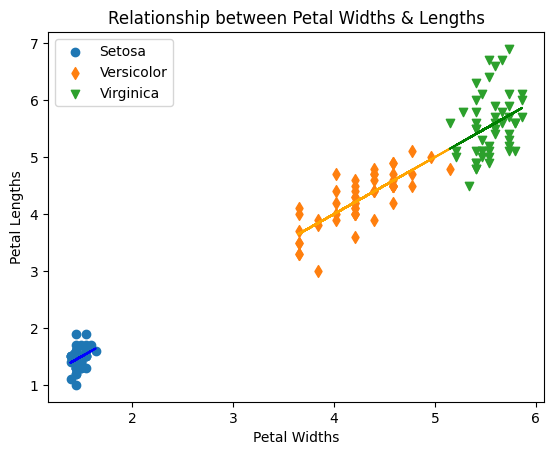

In [ ]:
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(setosa_petal_width,setosa_petal_length, marker="o",label="Setosa")
ax.scatter(versicolor_petal_width,versicolor_petal_length,marker="d", label="Versicolor")
ax.scatter(virginica_petal_width,virginica_petal_length,marker="v", label="Virginica")
ax.plot(setosa_petal_width, y1, color='blue')
ax.plot(versicolor_petal_width, y2, color='orange')
ax.plot(virginica_petal_width, y3, color='green')

# Labels
ax.set_xlabel("Petal Widths")
ax.set_ylabel("Petal Lengths")
ax.legend()

plt.title("Relationship between Petal Widths & Lengths")


## Task 7: Analyze Class Distributions

Create box-plots of the petal lengths for each of the three classes

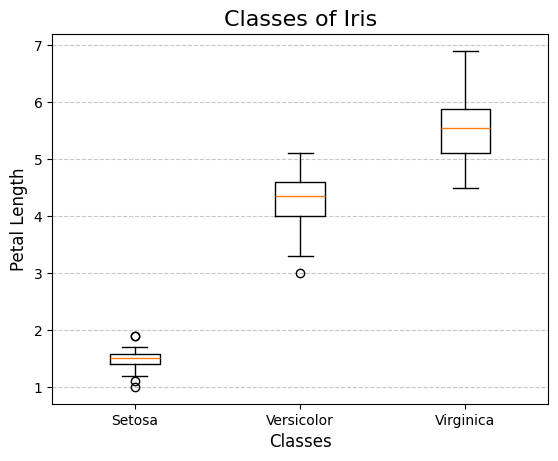

In [ ]:
setosa_petal_length=[iris[0][0][2],iris[0][1][2],iris[0][2][2],iris[0][3][2],iris[0][4][2],iris[0][5][2],iris[0][6][2],iris[0][7][2],iris[0][8][2],iris[0][9][2],iris[0][10][2],iris[0][11][2],iris[0][12][2],iris[0][13][2],iris[0][14][2],iris[0][15][2],iris[0][16][2],iris[0][17][2],iris[0][18][2],iris[0][19][2],iris[0][20][2],iris[0][21][2],iris[0][22][2],iris[0][23][2],iris[0][24][2],iris[0][25][2],iris[0][26][2],iris[0][27][2],iris[0][28][2],iris[0][29][2],iris[0][30][2],iris[0][31][2],iris[0][32][2],iris[0][33][2],iris[0][34][2],iris[0][35][2],iris[0][36][2],iris[0][37][2],iris[0][38][2],iris[0][39][2],iris[0][40][2],iris[0][41][2],iris[0][42][2],iris[0][43][2],iris[0][44][2],iris[0][45][2],iris[0][46][2],iris[0][47][2],iris[0][48][2],iris[0][49][2]]
versicolor_petal_length=[iris[1][0][2],iris[1][1][2],iris[1][2][2],iris[1][3][2],iris[1][4][2],iris[1][5][2],iris[1][6][2],iris[1][7][2],iris[1][8][2],iris[1][9][2],iris[1][10][2],iris[1][11][2],iris[1][12][2],iris[1][13][2],iris[1][14][2],iris[1][15][2],iris[1][16][2],iris[1][17][2],iris[1][18][2],iris[1][19][2],iris[1][20][2],iris[1][21][2],iris[1][22][2],iris[1][23][2],iris[1][24][2],iris[1][25][2],iris[1][26][2],iris[1][27][2],iris[1][28][2],iris[1][29][2],iris[1][30][2],iris[1][31][2],iris[1][32][2],iris[1][33][2],iris[1][34][2],iris[1][35][2],iris[1][36][2],iris[1][37][2],iris[1][38][2],iris[1][39][2],iris[1][40][2],iris[1][41][2],iris[1][42][2],iris[1][43][2],iris[1][44][2],iris[1][45][2],iris[1][46][2],iris[1][47][2],iris[1][48][2],iris[1][49][2]]
virginica_petal_length=[iris[2][0][2],iris[2][1][2],iris[2][2][2],iris[2][3][2],iris[2][4][2],iris[2][5][2],iris[2][6][2],iris[2][7][2],iris[2][8][2],iris[2][9][2],iris[2][10][2],iris[2][11][2],iris[2][12][2],iris[2][13][2],iris[2][14][2],iris[2][15][2],iris[2][16][2],iris[2][17][2],iris[2][18][2],iris[2][19][2],iris[2][20][2],iris[2][21][2],iris[2][22][2],iris[2][23][2],iris[2][24][2],iris[2][25][2],iris[2][26][2],iris[2][27][2],iris[2][28][2],iris[2][29][2],iris[2][30][2],iris[2][31][2],iris[2][32][2],iris[2][33][2],iris[2][34][2],iris[2][35][2],iris[2][36][2],iris[2][37][2],iris[2][38][2],iris[2][39][2],iris[2][40][2],iris[2][41][2],iris[2][42][2],iris[2][43][2],iris[2][44][2],iris[2][45][2],iris[2][46][2],iris[2][47][2],iris[2][48][2],iris[2][49][2]]

petal_lengths=np.array([setosa_petal_length, versicolor_petal_length,virginica_petal_length])
#print(petal_lengths)
# create figure, axis
fig, ax = plt.subplots()

# create boxplot, we will use .T because we need to transpose our data to make rows columns and columns rows because thats what boxplot expect)
ax.boxplot(petal_lengths.T)

# title
ax.set_title("Classes of Iris", fontsize=16)

# axis labels
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Petal Length", fontsize=12)

# set names of x-axis ticks, just puts the names on the horizontal axis 
ax.set_xticks([1,2,3],["Setosa","Versicolor","Virginica"], fontsize=10)

# add a grid so we have horizontal dotted lines making it easier to see the values on the chart, alpha is how transparent the dotted lines are
ax.grid(axis="y", linestyle="--", alpha=0.7)


We can see three very different boxplots. First, let's remind ourselves what a boxplot explains.

The orange line in the box, this is the median or the 50% percentile. 
The bottom of the box is the 25% percentile indicating that 25% of your values are less than that. 
The top of the box is the 75% percentile indicating that 25% of your values are above that. (50% of the values are in the box, 50% are outside, be it above or below)
The whiskers either side of the box are calculated by subracting the value at the 25% percentile from the 75% percentile (the interquartile range), and multiplying it by 1.5, and then it retreats back towards the box until it hits the first observation, their length tells you how disperse your data is. 
If there are observations outside the length of 1.5 x interquartile range, they can be referred to as outliers - these are indicated by circles above the top whisker or below the bottom whisker. If they exist, these tell us our maximums and minimums, otherwise the end ofthe whiskers give you the maximums and minimums. 

##### Medians
There are significant differences between our classes. Looking at the orange line, the Setosa petal median is around 1.5cms, while the Versicolor is about 4.5cms and the Virginica about 5.5cms. In all three, the orange line is in the middle of the boxes, so we can deduce there is little skewness in the data for each of the classes.
##### Interquartile Ranges
The interquartile range for the Setosa is very tight, while it is relatively consistent between the Versicolor and Virginica, although the Virginica is still bigger. Given that the interquartile range tells us where 50% of the values lie, then we can say that the variance of the length of Setosa petal is much small than the other two.
##### Whiskers
The whiskers are very short for the Setosa, again reinforcing how concentrated its data around the media. The whiskers for the Virginica are longer than that forthe Versicolor suggesting more variance in its data. Also, the lower whisker for the Versicolor is longer than the upper whisker suggesting it has observations at a lower distance from the median than it has observations at a higher distance from the median, ignoring outliers. For Virginica, the opposite is the case, the upper whisker is longer than the lower whisker suggesting it has observations at a higher distance from the median than it has observations at a lower distance from the median, ignoring outliers.
##### Outliers
There are some outliers above and below the whiskers for the Setosa class, not too far above and below it must be said. Given how tight the data is for Setosa, this is expected. For the Versicolor class, we already said how the lower whisker was longer than its upper whisker, well there is an outlier even below the bottom whisker.
##### Overlap
There is very little overlap between the three classes of iris, absolultely no overlap between Setosa and the other two. There is some overlap between high values of Versicolor against low values for Virginica. However, it is only the lower whisker of the Virginica, (that is 25%) that overlaps with the upper whisker of Versicolor and the op of the box (about 50% of Versicolor).
I would deduce from this boxplot, that the Setosa is very different class to the other two.


## Task 8: Compute Correlations

Calculate the correlation coefficients between the features.
Display the results as a heatmap using matplotlib.

## Task 9: Fit a Simple Linear Regression

For your two features in Task 5, calculate the coefficient of determination R 2 .
Re-create the plot from Task 6 and annotate it with the R 2 value.

## Task 10: Too Many Features

Use seaborn to create a pairplot of the data set.
Explain, in your own words, what the pairplot depicts.

## End